In [1]:
import sys
import os
import glob

from PIL import Image
import torch
import torchvision.transforms as transforms
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

sys.path.append(f"{os.getcwd()}/..")
from src.data.siar_data import SIAR_OCC

%matplotlib inline

/Users/boris/Library/Mobile Documents/com~apple~CloudDocs/Uni/Master/4. Semester/CV_Project/decomposition_learning/venv/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:61: FutureWarning: Importing `StructuralSimilarityIndexMeasure` from `torchmetrics` was deprecated and will be removed in 2.0. Import `StructuralSimilarityIndexMeasure` from `torchmetrics.image` instead.
  _future_warning(


In [2]:
dataset_targets = SIAR_OCC(split="train", split_version="split-1_80_10_10", sanity_check=False, manual_dataset_path="/Users/boris/Library/Mobile Documents/com~apple~CloudDocs/Uni/Master/4. Semester/CV_Project/decomposition_learning/data/SIAR")

In [3]:
def get_input_images(sample):
    sample_path = f"{os.getcwd()}/../data/SIAR/{sample}"
    # get all images in sequence
    images = glob.glob(f"{sample_path}/*.png")
    # sort images
    # images.sort()

    # get the last image, which is the gt
    # gt = images[-1]
    # gt is image that ends with gt.png
    gt = [x for x in images if x.endswith("gt.png")][0]
    # remove the last image, which is the gt
    # images are images without gt
    # images = images[:-1]
    images = [x for x in images if not x.endswith("gt.png")]

    transform = transforms.Compose([transforms.PILToTensor()])
    toGrayscale = transforms.Grayscale()
    toPIL = transforms.ToPILImage()

    # read the images and gt and convert to numpy arrays
    images_PIL = [Image.open(x) for x in images]
    # images = [transform(x) for x in images_PIL]
    # images = torch.stack(images).swapaxes(0, 1)

    # gt = transform(Image.open(gt))
    return images_PIL

In [4]:
def get_target_images(index):
    images, _, _, targets = dataset_targets[index]
    targets[:, [1, 9], :, :] = targets[:, [9, 1], :, :]

    targets_PIL = [transforms.ToPILImage()(x) for x in targets.swapaxes(0, 1)]
    images_PIL = [transforms.ToPILImage()(x) for x in images.swapaxes(0, 1)]

    return images_PIL, targets_PIL
    

In [5]:
def display_grid(images):
    fig, ax = plt.subplots(1, 10, figsize=(20, 30))
    for i in range(10):
        ax[i].imshow(images[i])
        ax[i].set_axis_off()
    plt.show()
    # save figure
    return fig


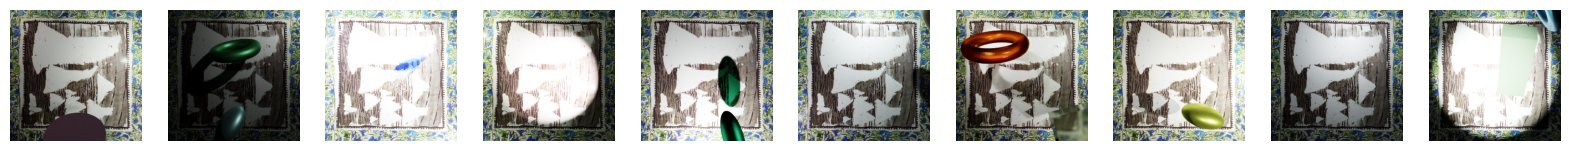

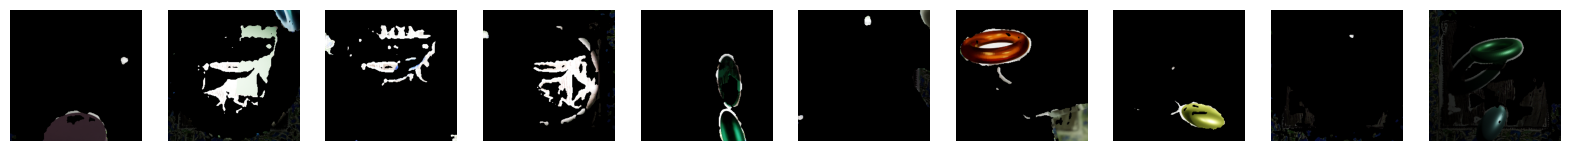

In [6]:
index = 1

sample = dataset_targets.df.iloc[index]["dir"].split("/")[-1]

# input_images = get_input_images(sample)
# input_images.sort()
input_images, target_images = get_target_images(index)

input_img = display_grid(input_images)
# input_img.savefig('input_images.png')
target_images = display_grid(target_images)
# target_images.savefig('target_images.png')